In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/investigating-netflix-movies-and-guest-stars/README.md
/kaggle/input/investigating-netflix-movies-and-guest-stars/notebook.ipynb
/kaggle/input/investigating-netflix-movies-and-guest-stars/datasets/netflix_data.csv
/kaggle/input/investigating-netflix-movies-and-guest-stars/datasets/color_data.csv


This project of the Datacamp platform seeks to make an exploratory analysis of the data and learn about the duration of movies over time. 

To begin with, we read the dataframe and review the content.

In [2]:
# Read in the CSV as a DataFrame
netflix_df = pd.read_csv("/kaggle/input/investigating-netflix-movies-and-guest-stars/datasets/netflix_data.csv")

# Print the first five rows of the DataFrame
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [3]:
netflix_df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

we have 2410 "TV Shows" and "Movies" in the dataset. For this case, I am interesting in movies

In [4]:
netflix_df = netflix_df[netflix_df['type'] == "Movie"]
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies


Starting from the premise of the exercise on the platform, it gives you 9 data of the average length of movies between 2011 and 2020 for you to graph. To make the matter more interesting, we do this procedure of the averages of the movies between 2011 and 2020 but from the same data

In [5]:
netflix_df.describe() 

,release_year,duration
count,5377.000000,5377.000000
mean,2012.920030,99.307978
std,9.663282,28.530881
min,1942.000000,3.000000
25%,2012.000000,86.000000
50%,2016.000000,98.000000
75%,2018.000000,114.000000
max,2021.000000,312.000000


In [6]:
# Select only the columns of interest
netflix_movies_col_subset = netflix_df[['title','country','genre','release_year','duration']]

# Print the first five rows of the new DataFrame
netflix_movies_col_subset.head()

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


In [7]:
# if I would like to know the durations over time...

netflix_year = netflix_movies_col_subset.groupby(netflix_movies_col_subset['release_year'])['duration'].mean().reset_index()
netflix_year.head()

,release_year,duration
0,1942,35.000000
1,1943,62.666667
2,1944,52.000000
3,1945,51.333333
4,1946,58.000000


In [8]:
# if I would like to know the duration from 2011 to 2020
netflix_year2 = netflix_year[netflix_year['release_year']>= 2011]
netflix_year2

,release_year,duration
61,2011,102.826772
62,2012,100.620253
63,2013,98.752475
64,2014,100.266393
65,2015,99.827225
66,2016,95.112150
67,2017,94.836022
68,2018,96.170300
69,2019,93.457045
70,2020,89.795620


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


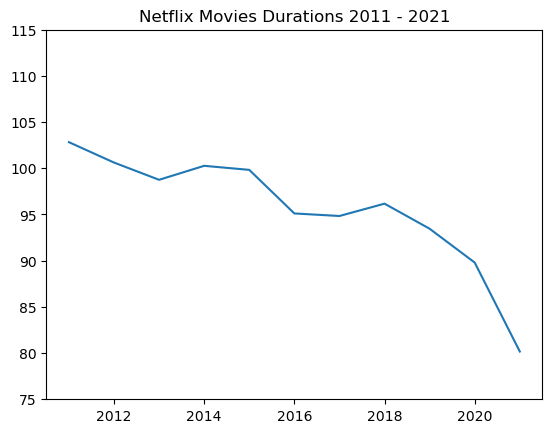

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure()

# Draw a line plot of release_years and durations
plt.plot(netflix_year2['release_year'],netflix_year2['duration'])
plt.ylim(75,115)

# Create a title
plt.title("Netflix Movies Durations 2011 - 2021")

# Show the plot
plt.show()

As can be seen in the graph, the data may show that the average number of films has decreased over time. However, this may be a case of misinformation. We will explore the data further.

In [10]:
netflix_df = netflix_df.sort_values('duration', ascending = False)
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
957,s958,Movie,Black Mirror: Bandersnatch,NaN,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,"December 28, 2018",2018,312,"In 1984, a young programmer begins to question...",Dramas
6850,s6851,Movie,The School of Mischief,Houssam El-Din Mustafa,"Suhair El-Babili, Adel Emam, Saeed Saleh, Youn...",Egypt,"May 21, 2020",1973,253,A high school teacher volunteers to transform ...,Comedies
4490,s4491,Movie,No Longer kids,Samir Al Asfory,"Said Saleh, Hassan Moustafa, Ahmed Zaki, Youne...",Egypt,"May 21, 2020",1979,237,Hoping to prevent their father from skipping t...,Comedies
3694,s3695,Movie,Lock Your Girls In,Fouad El-Mohandes,"Fouad El-Mohandes, Sanaa Younes, Sherihan, Ahm...",NaN,"May 21, 2020",1982,233,A widower believes he must marry off his three...,Comedies
5108,s5109,Movie,Raya and Sakina,Hussein Kamal,"Suhair El-Babili, Shadia, Abdel Moneim Madboul...",NaN,"May 21, 2020",1984,230,When robberies and murders targeting women swe...,Comedies
...,...,...,...,...,...,...,...,...,...,...,...
463,s464,Movie,American Factory: A Conversation with the Obamas,NaN,"President Barack Obama, Michelle Obama, Julia ...",United States,"September 5, 2019",2019,10,Barack and Michelle Obama talk with directors ...,Documentaries
1203,s1204,Movie,Canvas,Frank E. Abney III,NaN,United States,"December 11, 2020",2020,9,"After a heartbreaking loss, a grandfather stru...",Children
1501,s1502,Movie,Cops and Robbers,"Arnon Manor, Timothy Ware-Hill",Timothy Ware-Hill,United States,"December 28, 2020",2020,8,Animation and activism unite in this multimedi...,Dramas
5694,s5695,Movie,Sol Levante,Akira Saitoh,NaN,Japan,"April 2, 2020",2020,5,A young warrior and her familiar search for th...,Action


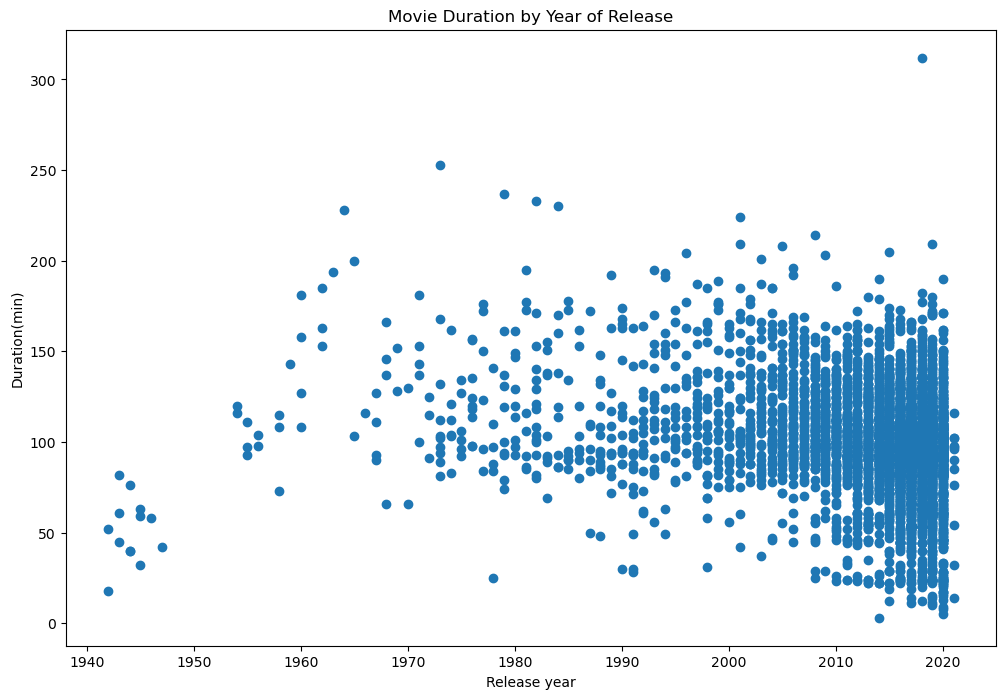

In [11]:
# Create a figure and increase the figure size
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus year
plt.scatter(netflix_movies_col_subset['release_year'],netflix_movies_col_subset['duration'])

# Create a title
plt.title('Movie Duration by Year of Release')
plt.xlabel("Release year")
plt.ylabel("Duration(min)")

# Show the plot
plt.show()

Despite having filtered the movies in the 'type' column, there are records for movies shorter than 60 minutes. This may represent short films for the smaller records. 

In [12]:
# Filter for durations shorter than 60 minutes
short_movies = netflix_movies_col_subset[netflix_movies_col_subset['duration'] < 60 ]

# Print the first 20 rows of short_movies
short_movies[0:20]

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28
162,A Christmas Special: Miraculous: Tales of Lady...,France,Uncategorized,2016,22
171,A Family Reunion Christmas,United States,Uncategorized,2019,29
177,A Go! Go! Cory Carson Christmas,United States,Children,2020,22
178,A Go! Go! Cory Carson Halloween,NaN,Children,2020,22
179,A Go! Go! Cory Carson Summer Camp,NaN,Children,2020,21


Interesting! It looks as though many of the films that are under 60 minutes fall into genres such as "Children", "Stand-Up", and "Documentaries". This is a logical result, as these types of films are probably often shorter than 90 minute Hollywood blockbuster.

One way to explore the effect of these genres on our data would be to plot them, but mark them with a different color.

In [13]:
# Define an empty list
colors = []

# Iterate over rows of netflix_movies_col_subset
for lab, row in netflix_movies_col_subset.iterrows():
    if row['genre'] == "Children":
        colors.append("red")
    elif row['genre'] == "Documentaries":
        colors.append("blue")
    elif row['genre'] == "Stand-Up":
        colors.append("green")
    elif row['genre'] == "Uncategorized":
        colors.append("yellow")
    else:
        colors.append("black")

# Inspect the first 10 values in your list      
colors[0:10]

['black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'blue']

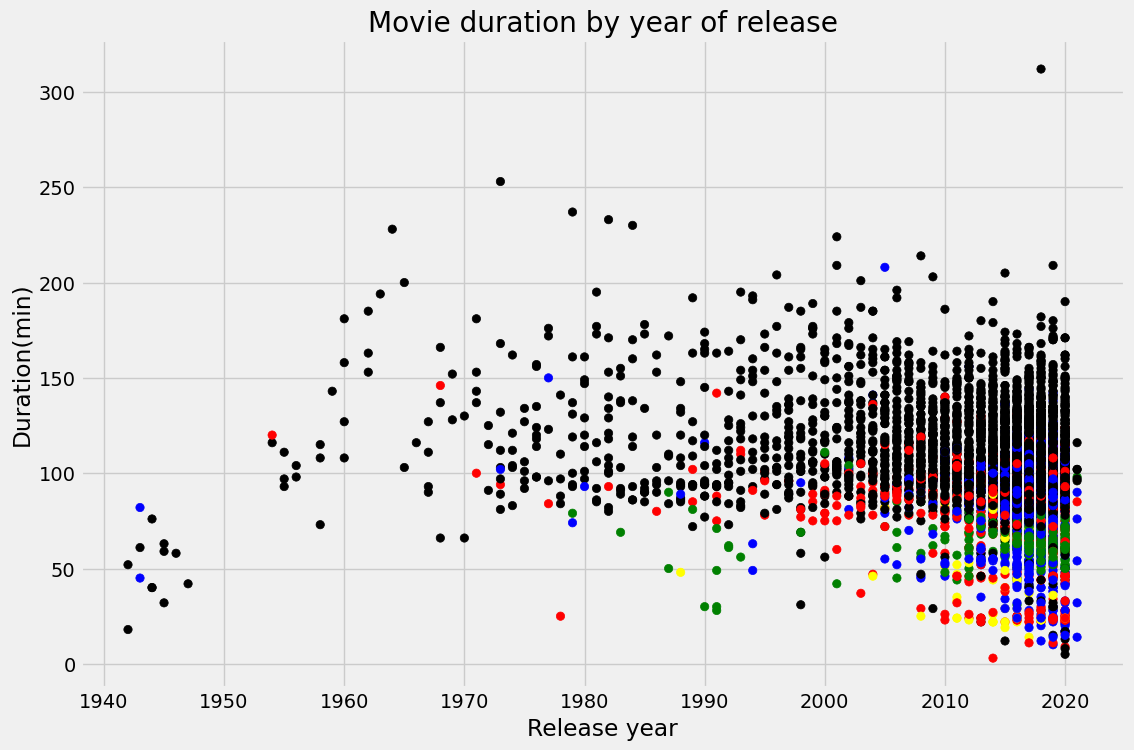

In [14]:
# Set the figure style and initalize a new figure
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus release_year
plt.scatter(netflix_movies_col_subset['release_year'],netflix_movies_col_subset['duration'],c=colors)

# Create a title and axis labels
plt.title("Movie duration by year of release")
plt.xlabel("Release year")
plt.ylabel("Duration(min)")
...

# Show the plot
plt.show()

Finally, we are going to eliminate these records in different black color, and re-plot the average per year. Also over time there has been an increase in the number of movies released that would be interesting to know. 

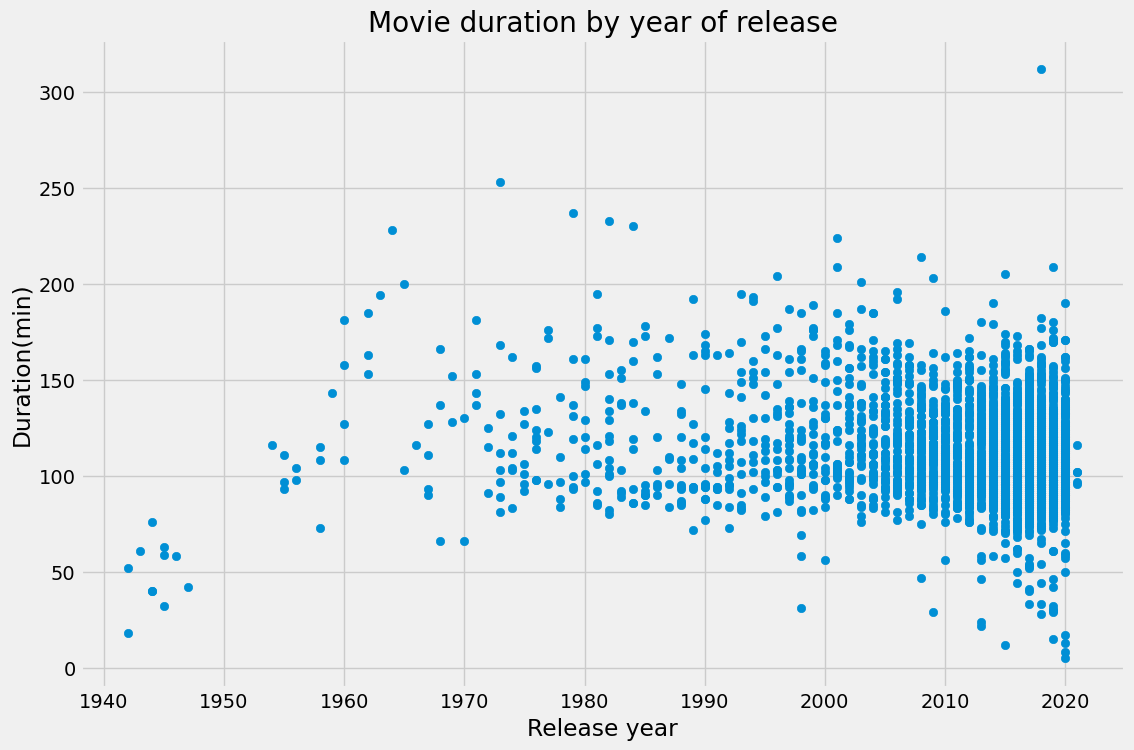

In [15]:
omitcats = ['Children','Documentaries','Stand-Up','Uncategorized']



netflix_movies_filter = netflix_movies_col_subset[~netflix_movies_col_subset['genre'].isin(omitcats)]


# Set the figure style and initalize a new figure
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus release_year
plt.scatter(netflix_movies_filter['release_year'],netflix_movies_filter['duration'])

# Create a title and axis labels
plt.title("Movie duration by year of release")
plt.xlabel("Release year")
plt.ylabel("Duration(min)")
...

# Show the plot
plt.show()

In [16]:
netflix_movies_filter.sort_values('release_year',ascending=False)

,title,country,genre,release_year,duration
7551,What Happened to Mr. Cha?,South Korea,Comedies,2021,102
4710,Outside the Wire,NaN,Action,2021,116
5859,Stuck Apart,Turkey,Comedies,2021,97
7644,Wish You,NaN,Dramas,2021,102
7220,Tribhanga - Tedhi Medhi Crazy,NaN,Dramas,2021,96
...,...,...,...,...,...
6657,The Memphis Belle: A Story of a\nFlying Fortress,United States,Classic Movies,1944,40
6699,The Negro Soldier,United States,Classic Movies,1944,40
7342,Undercover: How to Operate Behind Enemy Lines,United States,Classic Movies,1943,61
6117,The Battle of Midway,United States,Classic Movies,1942,18


In [17]:
#Group by year, but agg function prom and value_count
new_netflix_df = netflix_movies_filter.groupby('release_year').agg({'duration': 'mean', 'title': 'count'}).reset_index()
new_netflix_df

,release_year,duration,title
0,1942,35.000000,2
1,1943,61.000000,1
2,1944,52.000000,3
3,1945,51.333333,3
4,1946,58.000000,1
...,...,...,...
67,2017,104.447983,471
68,2018,105.820565,496
69,2019,105.596730,367
70,2020,105.621277,235


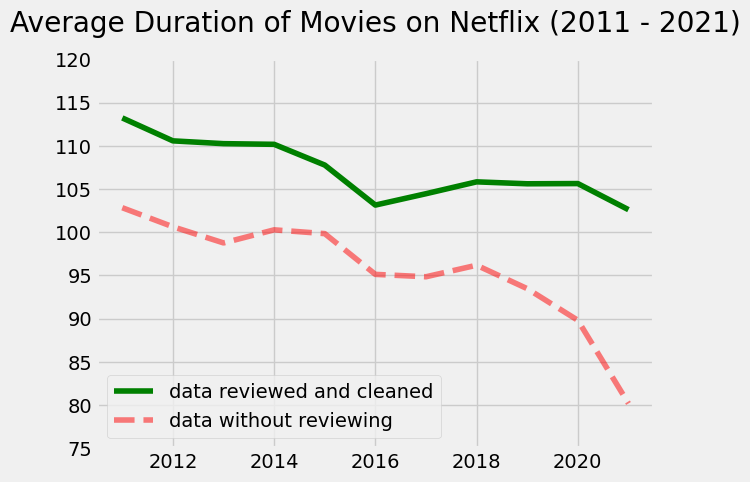

In [41]:
fig = plt.figure()

# Draw a line plot of release_years and durations

netflix_year[netflix_year['release_year']>= 2011]
plt.plot(new_netflix_df[new_netflix_df['release_year']>=2011]['release_year'],
         new_netflix_df[new_netflix_df['release_year']>=2011]['duration'],
         label='data reviewed and cleaned',
         color= 'green')
plt.plot(netflix_year2['release_year'],netflix_year2['duration'],
         alpha=0.5,label='data without reviewing',
         color='red',linestyle='dashed')
plt.ylim(75,120)
plt.legend(loc='lower left')

# Create a title
plt.title("Average Duration of Movies on Netflix (2011 - 2021)",pad=20)


# Show the plot
plt.show()